<a href="https://colab.research.google.com/github/tomarforever86/CNN/blob/main/CNN_Digits.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [54]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
%matplotlib inline      
import numpy as np

In [55]:
(X_train, y_train) , (X_test, y_test) = keras.datasets.mnist.load_data()

In [56]:
X_train.shape

(60000, 28, 28)

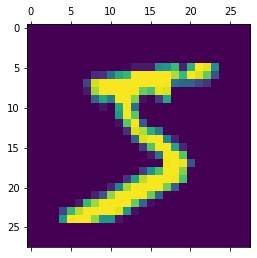

In [57]:
plt.matshow(X_train[0])

In [58]:
#Scaling values to 0 and 1

X_train = X_train / 255
X_test = X_test / 255

Now training simple NN without any hidden layer using sigmoid giving 92% accuracy on training set

In [ ]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(10, activation='sigmoid')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(X_train, y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 3s 1ms/step - loss: 0.4653 - accuracy: 0.8789
Epoch 2/5
1875/1875 [==============================] - 3s 1ms/step - loss: 0.3035 - accuracy: 0.9151
Epoch 3/5
1875/1875 [==============================] - 3s 1ms/step - loss: 0.2834 - accuracy: 0.9208
Epoch 4/5
1875/1875 [==============================] - 3s 1ms/step - loss: 0.2733 - accuracy: 0.9238
Epoch 5/5
1875/1875 [==============================] - 3s 1ms/step - loss: 0.2663 - accuracy: 0.9259


Now training NN with 2 hidden layers where 1st hidden layer having 200 neurons and 2nd having 100 neurons, for hidden layers we are using relu and for output layer we are using sigmoid giving 98.7% accuracy

Documentation at tensorflow.org

Using Flatten layer so that we don't have to call .reshape on input dataset

In [ ]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(200, activation='relu'),
    keras.layers.Dense(100, activation='relu'),
    keras.layers.Dense(10, activation='sigmoid')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(X_train, y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2218 - accuracy: 0.9346
Epoch 2/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0923 - accuracy: 0.9724
Epoch 3/5
1875/1875 [==============================] - 5s 2ms/step - loss: 0.0613 - accuracy: 0.9808
Epoch 4/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0472 - accuracy: 0.9844
Epoch 5/5
1875/1875 [==============================] - 5s 2ms/step - loss: 0.0383 - accuracy: 0.9870


In [ ]:
model.evaluate(X_test, y_test)

313/313 [==============================] - 1s 1ms/step - loss: 0.0844 - accuracy: 0.9751


[0.08444235473871231, 0.9750999808311462]

Text(69.0, 0.5, 'Truth')

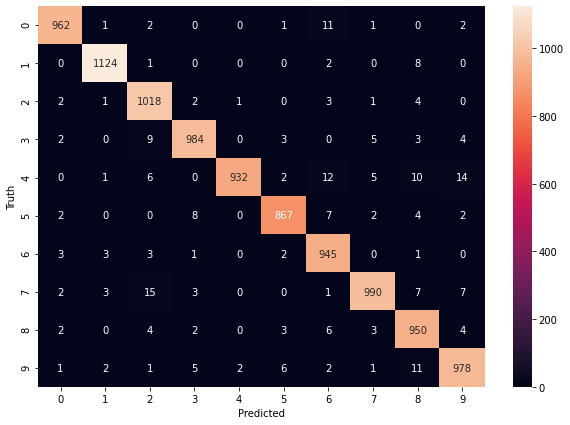

In [ ]:
import seaborn as sn

y_predicted = model.predict(X_test)
y_predicted_labels = [np.argmax(i) for i in y_predicted]
cm = tf.math.confusion_matrix(labels=y_test,predictions=y_predicted_labels)

plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [59]:
X_train = X_train.reshape(-1,28,28,1)
X_test = X_test.reshape(-1,28,28,1)

In [60]:
#Now building CNN Model

cnn = models.Sequential([
    layers.Conv2D(30, (3, 3), activation='relu', input_shape=(28, 28,1)),
    layers.MaxPooling2D((2, 2)),
    
    #layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
    #layers.MaxPooling2D((2, 2)),
    
    layers.Flatten(),
    layers.Dense(100, activation='relu'),
    keras.layers.Dense(10, activation='sigmoid')
])

In [61]:
cnn.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [62]:
cnn.fit(X_train, y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 36s 19ms/step - loss: 0.1600 - accuracy: 0.9533
Epoch 2/5
1875/1875 [==============================] - 35s 19ms/step - loss: 0.0549 - accuracy: 0.9834
Epoch 3/5
1875/1875 [==============================] - 35s 19ms/step - loss: 0.0358 - accuracy: 0.9890
Epoch 4/5
1875/1875 [==============================] - 35s 19ms/step - loss: 0.0252 - accuracy: 0.9921
Epoch 5/5
1875/1875 [==============================] - 35s 19ms/step - loss: 0.0174 - accuracy: 0.9941


In [64]:
cnn.evaluate(X_test,y_test)

313/313 [==============================] - 2s 7ms/step - loss: 0.0526 - accuracy: 0.9839


[0.052606310695409775, 0.9839000105857849]